#### Acquisition of elevation data

In [2]:
import numpy as np
csv_path = "mtfuji_data.csv" # Spécifiez le nom du fichier (chemin)

np.set_printoptions(suppress=True) # Interdire l'affichage exponentiel
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


### [Problem 1] Visualization of data


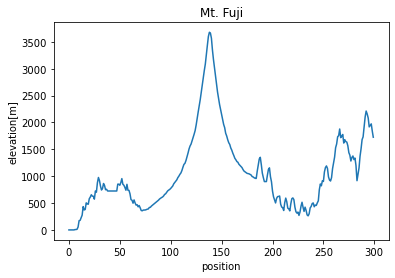

In [3]:
import matplotlib.pyplot as plt

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:,0],fuji[:,3])

### [Problem 2] Create a function to calculate the slope of a point


In [19]:
def gradient_of(current_point):
    x = fuji[:,0] #extract numero de point
    y = fuji[:,3] # extract elevation
    
    gradient = (y[current_point] - y[current_point - 1])/(x[current_point] - x[current_point -1])
    
    return gradient

gradient_of(0)

5.77190635451505

### [Problem 3] Create a function to calculate the destination


In [85]:
# destination_point = current point - alpha*current_point_gradient
# alpha in the hyper-parameters

def destination(current_point,alpha):
    destination_point = current_point - alpha*gradient_of(current_point)
    
    if destination_point <= 0:
        return 0
    else:
        return round(destination_point)

# exemple of destination

destination(75, alpha=0.2)

75

### [Problem 4] Creating a function to go down the mountain

In [88]:
def go_down_the_mountain(alpha):
    
    position_list = np.array([136])
    next_destination = destination(136,alpha)
        
    for i in np.arange(fuji.shape[0]):
        next_destination = destination(next_destination,alpha)
        
        if position_list[i] == next_destination:
            break
        else:
            position_list = np.append(position_list,next_destination)
        
    
    return position_list

go_down_the_mountain(alpha=0.2)

array([136,  98,  95,  93,  89,  85,  82,  79,  73,  70,  78,  77,  75])

### [Problem 5] Visualization of the descent process


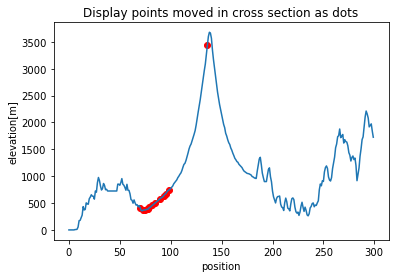

In [89]:
import matplotlib.pyplot as plt

positions_list = go_down_the_mountain(alpha=0.2)

point_array = [fuji[position,3] for position in positions_list] # for each go_down positions


plt.title("Display points moved in cross section as dots")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:,0],fuji[:,3])
plt.scatter(positions_list,point_array, c="r")

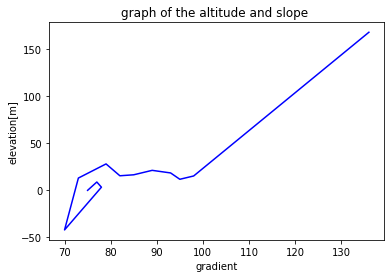

In [90]:
gradient_for_each_position = [gradient_of(positon) for positon in positions_list ]

plt.title("graph of the altitude and slope ")
plt.xlabel("gradient")
plt.ylabel("elevation[m]")

plt.plot(positions_list,gradient_for_each_position,c="b")

### [Problem 6] Change of initial value


array([136, 102,  98,  95,  93,  89,  85,  82,  79,  73,  70,  78,  77,
        75])

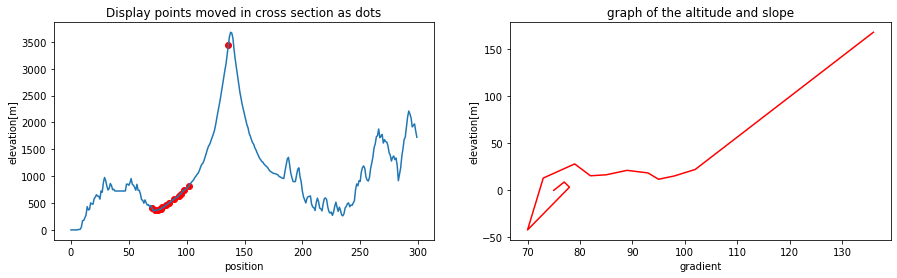

In [91]:
def go_down_the_mountain_from(current_position,alpha):
    
    figure = plt.figure(figsize=(15,4))
    fig1 = figure.add_subplot(1,2,1)
    fig2 = figure.add_subplot(1,2,2)
    
    position_list = np.array([current_position])
        
    for i in np.arange(fuji.shape[0]):
        current_position = destination(current_position,alpha)
        
        if position_list[i] == current_position:
            break
        else:
            position_list = np.append(position_list,current_position)
        
    
    point_array = [fuji[position,3] for position in position_list] # for each go_down positions
    
    gradient_for_each_position = [gradient_of(positon) for positon in position_list ]
    
    fig1.set_title("Display points moved in cross section as dots")

    fig1.set_xlabel("position")

    fig1.set_ylabel("elevation[m]")

    fig1.plot(fuji[:,0],fuji[:,3])

    fig1.scatter(position_list,point_array, c="r")
    
    
    fig2.set_title("graph of the altitude and slope")

    fig2.set_xlabel("gradient")

    fig2.set_ylabel("elevation[m]")

    fig2.plot(position_list,gradient_for_each_position, c="r")
    

    return position_list

go_down_the_mountain_from(136,alpha=0.2)

### [Problem 7] Visualization of the descent process for each initial value


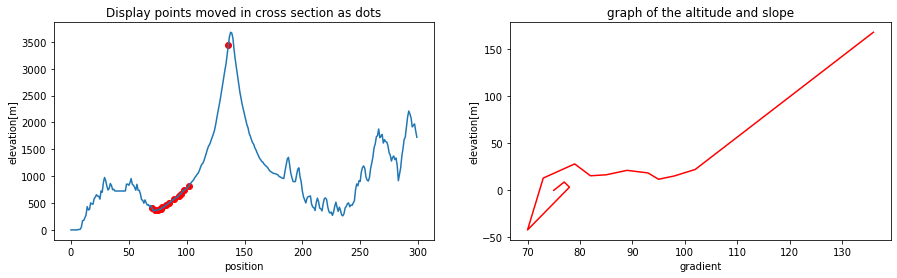

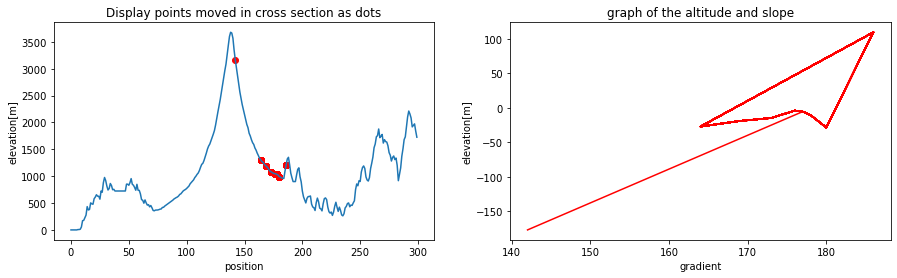

In [92]:
def descent_process_for_each(values):
    
    for value in values:
        go_down_the_mountain_from(value,alpha=0.2)
    
descent_process_for_each([136,142],alpha=0.2)

### [Problem 8] (Advance problem) Hyperparameter change

In [94]:
def descent_process_for(alphas):
    
    for value in values:
        go_down_the_mountain_from(value,alpha=0.2)
    
descent_process_for(136,[0.2,0.5])

TypeError: descent_process_for() takes 1 positional argument but 2 were given